In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import ast

### Create separate dataframes for the Billboard Top 100, Grammy winners, and Spotify data.

In [3]:
billboard = "../data/charts.csv"
billboard_df = pd.read_csv(billboard)
grammy = "../data/grammy_winners.csv"
grammy_df = pd.read_csv(grammy)
spotify = "../data/data.csv"
spotify_df = pd.read_csv(spotify)

#### Investigate columns. Remove unnecessary columns and rename for clarity prior to merging.

In [5]:
spotify_df.head()

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [6]:
spotify_df = spotify_df.rename(columns={'year': 'song_release_year', 'artists': 'artist', 'name':'song_or_album'})
spotify_df.head()

,id,song_or_album,artist,duration_ms,release_date,song_release_year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [7]:
grammy_df.head()

,year,annual_edition,category,artist,producers,song_or_album,winner,url
0,2024,67,Best Boxed Or Special Limited Edition Package,"Nick Azinas & Mike Hicks, art directors (Alpha...",NaN,Half Living Things,False,https://www.grammy.com/awards/67th-annual-gram...
1,2024,67,Best Instrumental Composition,NaN,Strands,Strands,True,https://www.grammy.com/awards/67th-annual-gram...
2,2024,67,Best Opera Recording,"John Adams, conductor; Paul Appleby, Julia Bul...",NaN,Adams: Girls Of The Golden West,False,https://www.grammy.com/awards/67th-annual-gram...
3,2024,67,Best Classical Instrumental Solo,Andy Akiho,NaN,Akiho: Longing,False,https://www.grammy.com/awards/67th-annual-gram...
4,2024,67,Best Classical Solo Vocal Album,NaN,Beyond The Years - Unpublished Songs Of Floren...,Beyond The Years - Unpublished Songs Of Floren...,True,https://www.grammy.com/awards/67th-annual-gram...


In [8]:
grammy_df = grammy_df.rename(columns={'category': 'grammy_category', 'winner': 'grammy_winner', 'year': 'grammy_year','annual_edition':'grammy_edition'})
grammy_df.head()

,grammy_year,grammy_edition,grammy_category,artist,producers,song_or_album,grammy_winner,url
0,2024,67,Best Boxed Or Special Limited Edition Package,"Nick Azinas & Mike Hicks, art directors (Alpha...",NaN,Half Living Things,False,https://www.grammy.com/awards/67th-annual-gram...
1,2024,67,Best Instrumental Composition,NaN,Strands,Strands,True,https://www.grammy.com/awards/67th-annual-gram...
2,2024,67,Best Opera Recording,"John Adams, conductor; Paul Appleby, Julia Bul...",NaN,Adams: Girls Of The Golden West,False,https://www.grammy.com/awards/67th-annual-gram...
3,2024,67,Best Classical Instrumental Solo,Andy Akiho,NaN,Akiho: Longing,False,https://www.grammy.com/awards/67th-annual-gram...
4,2024,67,Best Classical Solo Vocal Album,NaN,Beyond The Years - Unpublished Songs Of Floren...,Beyond The Years - Unpublished Songs Of Floren...,True,https://www.grammy.com/awards/67th-annual-gram...


In [9]:
billboard_df.head()

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18


In [10]:
billboard_df = billboard_df.rename(columns={'date': 'billboard_date', 'weeks-on-board': 'weeks_on_billboard','peak-rank': 'peak_billboard_rank', 'song': 'song_or_album'})
billboard_df = billboard_df.drop(columns=['last-week'], errors='ignore')
billboard_df.head()

,billboard_date,rank,song_or_album,artist,peak_billboard_rank,weeks_on_billboard
0,2021-11-06,1,Easy On Me,Adele,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,2,18


#### Since we are merging using the song_or_album and artist columns, we need to ensure that they are standardly formatted across each dataframe. Create a function to clean the text by replacing accented characters with unaccented, removing symbols, and making all letters lowercase. Additionally, account for different versions of songs such as live/remastered.

In [12]:
def full_clean(text, mode='song'):
    if pd.isna(text):
        return ''
    text = str(text).lower().strip()
    
    if mode == 'song':
        text = re.sub(r"\(.*?\)", "", text)
        text = re.sub(r"-.*$", "", text)

        version_keywords = [
            'remaster', 'live', 'acoustic', 'version', 
            'edit', 'mix', 'explicit', 'radio', 
            'single', 'deluxe'
        ]
        for keyword in version_keywords:
            text = re.sub(rf"\b{keyword}\b", "", text)
    
    if mode == 'artist':
        text = re.split(r'\b(feat|featuring|ft|&|and)\b', text)[0]
        text = text.split(',')[0]
    
    replacements = {
        'á': 'a', 'à': 'a', 'ä': 'a',
        'é': 'e', 'è': 'e', 'ê': 'e', 'ë': 'e',
        'í': 'i', 'î': 'i', 'ï': 'i',
        'ó': 'o', 'ô': 'o', 'ö': 'o',
        'ú': 'u', 'û': 'u', 'ü': 'u',
        'ç': 'c'
    }
    for accented_char, replacement in replacements.items():
        text = text.replace(accented_char, replacement)

    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    
    return text.strip()

#### Apply cleaning to all dataframes.

In [14]:
billboard_df['artist_clean'] = billboard_df['artist'].apply(lambda x: full_clean(x, mode='artist'))
grammy_df['artist_clean'] = grammy_df['artist'].apply(lambda x: full_clean(x, mode='artist'))
spotify_df['artist_clean'] = spotify_df['artist'].apply(lambda x: full_clean(x, mode='artist'))

In [15]:
billboard_df['song_clean'] = billboard_df['song_or_album'].apply(lambda x: full_clean(x, mode='song'))
grammy_df['song_clean'] = grammy_df['song_or_album'].apply(lambda x: full_clean(x, mode='song'))
spotify_df['song_clean'] = spotify_df['song_or_album'].apply(lambda x: full_clean(x, mode='song'))

#### Merge the Grammy and Billboard dataframes and check work. 

In [17]:
music_df = pd.merge(billboard_df,grammy_df, how='left', on=['artist_clean', 'song_clean'])

In [18]:
music_df.head()

,billboard_date,rank,song_or_album_x,artist_x,peak_billboard_rank,weeks_on_billboard,artist_clean,song_clean,grammy_year,grammy_edition,grammy_category,artist_y,producers,song_or_album_y,grammy_winner,url
0,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me,2022.0,65.0,Best Pop Solo Performance,Adele,NaN,Easy On Me,True,https://www.grammy.com/awards/65th-annual-gram...
1,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me,2022.0,65.0,Record Of The Year,Adele,"Greg Kurstin, producer; Julian Burg, Tom Elmhi...",Easy On Me,False,https://www.grammy.com/awards/65th-annual-gram...
2,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me,2022.0,65.0,Best Music Video,Adele,"Xavier Dolan, video director; Xavier Dolan, Nk...",Easy On Me,False,https://www.grammy.com/awards/65th-annual-gram...
3,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,1,16,the kid laroi justin bieber,stay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,1,14,lil nas x jack harlow,industry baby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
music_df.columns

Index(['billboard_date', 'rank', 'song_or_album_x', 'artist_x',
       'peak_billboard_rank', 'weeks_on_billboard', 'artist_clean',
       'song_clean', 'grammy_year', 'grammy_edition', 'grammy_category',
       'artist_y', 'producers', 'song_or_album_y', 'grammy_winner', 'url'],
      dtype='object')

#### Merge the Spotify and Music dataframes and check work. 

In [21]:
clean_merge_df = pd.merge(music_df, spotify_df, how='left', on=['artist_clean', 'song_clean'])

In [22]:
clean_merge_df.columns

Index(['billboard_date', 'rank', 'song_or_album_x', 'artist_x',
       'peak_billboard_rank', 'weeks_on_billboard', 'artist_clean',
       'song_clean', 'grammy_year', 'grammy_edition', 'grammy_category',
       'artist_y', 'producers', 'song_or_album_y', 'grammy_winner', 'url',
       'id', 'song_or_album', 'artist', 'duration_ms', 'release_date',
       'song_release_year', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'mode', 'key', 'popularity', 'explicit'],
      dtype='object')

In [23]:
clean_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474359 entries, 0 to 474358
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   billboard_date       474359 non-null  object 
 1   rank                 474359 non-null  int64  
 2   song_or_album_x      474359 non-null  object 
 3   artist_x             474359 non-null  object 
 4   peak_billboard_rank  474359 non-null  int64  
 5   weeks_on_billboard   474359 non-null  int64  
 6   artist_clean         474359 non-null  object 
 7   song_clean           474359 non-null  object 
 8   grammy_year          102925 non-null  float64
 9   grammy_edition       102925 non-null  float64
 10  grammy_category      102925 non-null  object 
 11  artist_y             102925 non-null  object 
 12  producers            15506 non-null   object 
 13  song_or_album_y      102925 non-null  object 
 14  grammy_winner        102925 non-null  object 
 15  url              

In [24]:
clean_merge_df.isnull().sum()

billboard_date              0
rank                        0
song_or_album_x             0
artist_x                    0
peak_billboard_rank         0
weeks_on_billboard          0
artist_clean                0
song_clean                  0
grammy_year            371434
grammy_edition         371434
grammy_category        371434
artist_y               371434
producers              458853
song_or_album_y        371434
grammy_winner          371434
url                    371434
id                     120022
song_or_album          120022
artist                 120022
duration_ms            120022
release_date           120022
song_release_year      120022
acousticness           120022
danceability           120022
energy                 120022
instrumentalness       120022
liveness               120022
loudness               120022
speechiness            120022
tempo                  120022
valence                120022
mode                   120022
key                    120022
popularity

#### We want to make clear which rows were a part of the grammys (nominated or winner), and which have never been a part of the grammys. Replace NaN values with "not nominated" to create this distinction.

In [26]:
fill = ['grammy_year', 'grammy_edition', 'grammy_category', 'grammy_winner']

clean_merge_df[fill] = clean_merge_df[fill].fillna('not nominated')
clean_merge_df.head()

,billboard_date,rank,song_or_album_x,artist_x,peak_billboard_rank,weeks_on_billboard,artist_clean,song_clean,grammy_year,grammy_edition,...,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me,2022.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me,2022.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me,2022.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,1,16,the kid laroi justin bieber,stay,not nominated,not nominated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,1,14,lil nas x jack harlow,industry baby,not nominated,not nominated,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The NaN values still need to be handled. For instances where Grammy winners do not have spotify data, we can still provide meaningful analysis in some form. For songs that were not nominated and have no spotify insights, there is minimal analysis that can be done. Let's drop those columns to reduce our data to more meaningful rows.

In [28]:
rows_to_drop = clean_merge_df[(clean_merge_df['grammy_winner'] == 'not nominated') & (clean_merge_df.isnull().any(axis=1))]
final_df = clean_merge_df.drop(rows_to_drop.index)
final_df.head()

,billboard_date,rank,song_or_album_x,artist_x,peak_billboard_rank,weeks_on_billboard,artist_clean,song_clean,grammy_year,grammy_edition,...,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me,2022.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me,2022.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me,2022.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-11-06,8,Good 4 U,Olivia Rodrigo,1,24,olivia rodrigo,good 4 u,2021.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2021-11-06,9,Need To Know,Doja Cat,9,20,doja cat,need to know,2021.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
final_df.isnull().sum()

billboard_date             0
rank                       0
song_or_album_x            0
artist_x                   0
peak_billboard_rank        0
weeks_on_billboard         0
artist_clean               0
song_clean                 0
grammy_year                0
grammy_edition             0
grammy_category            0
artist_y                   0
producers              87419
song_or_album_y            0
grammy_winner              0
url                        0
id                      7230
song_or_album           7230
artist                  7230
duration_ms             7230
release_date            7230
song_release_year       7230
acousticness            7230
danceability            7230
energy                  7230
instrumentalness        7230
liveness                7230
loudness                7230
speechiness             7230
tempo                   7230
valence                 7230
mode                    7230
key                     7230
popularity              7230
explicit      

#### There is still quite a bit of missing Spotify data. Unfortunately there is no easy fix for this, so we will need to provide a disclaimer within our data analysis.

In [31]:
final_df.shape

(102925, 35)

In [32]:
# We still have a decent amount of data to work with 
#Approx 103000 rows, with only 7230 missing spotify data. Not too bad considering. ~7.03%

#### Replace values within the columns merged from the Spotify dataframe for easier interpretation.
##### A breakdown of column information is below:

**song_or_album:** The track's title.<br>
**artist:** Artist/s who participated in the track.<br>
**duration_ms:** Length of the track in milliseconds (ms).<br>
**song_release_year:** The year in which the track was released.<br>
**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic.<br>
**danceability:** Describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.<br>
**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast and loud.<br>
**instrumentalness:** Predicts whether a track contains no vocals.<br>
**liveness:** Detects the presence of an audience in the recording.<br>
**loudness:** The overall loudness of a track in decibels (dB).<br>
**speechiness:** Detects the presence of spoken words in a track.<br>
**tempo:** The overall estimated tempo of a track in beats per minute (BPM).<br>
**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.<br>
**mode:** Melodic content from the modality of a track. 1 = Major; 0 = Minor.<br>
**key:** The estimated overall key of a track from the Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.<br>
**popularity:** A track's popularity, 0-100 where 100 is the most popular based on Spotify's algorithm.<br>
**explicit:** Whether or not the track has explicit lyrics. 1 = True; 0 = False.<br>

In [35]:
spotify_df.head()

,id,song_or_album,artist,duration_ms,release_date,song_release_year,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,tempo,valence,mode,key,popularity,explicit,artist_clean,song_clean
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,...,-12.428,0.0506,118.469,0.7790,1,10,0,0,carl woitschach,singende bataillone 1 teil
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,...,-28.454,0.0462,83.972,0.0767,1,8,0,0,robert schumann,fantasiestucke op 111 più tosto lento
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,...,-19.924,0.9290,107.177,0.8800,0,5,0,0,seweryn goszczyński,chapter 118
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,...,-14.734,0.0926,108.003,0.7200,0,1,0,0,francisco canaro,bebamos juntos
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,...,-16.829,0.0424,62.149,0.0693,1,11,1,0,frederic chopin,polonaise


In [36]:
spotify_df['key'].value_counts().sort_values

<bound method Series.sort_values of key
0     21499
7     20757
2     18821
9     17628
5     16336
4     12921
1     12816
10    12056
8     10711
11    10593
6      8586
3      7185
Name: count, dtype: int64>

#### Replace keys based on their pitch class. Use similar strategy to clean the "explicit" and "mode" columns.

In [38]:
pitch_class = {
    0: 'C',
    1: 'C sharp / D flat',
    2: 'D',
    3: 'D sharp / E flat',
    4: 'E',
    5: 'F',
    6: 'F sharp / G flat',
    7: 'G',
    8: 'G sharp / A flat',
    9: 'A',
    10: 'A sharp / B flat',
    11: 'B'
}

lyrics_class = { 
    1: 'explicit',
    0: 'not explicit'
}

modality = {
    1: 'major',
    0: 'minor'
}

final_df['key'] = final_df['key'].replace(pitch_class)
final_df['explicit'] = final_df['explicit'].replace(lyrics_class)
final_df['mode'] = final_df['mode'].replace(modality)
final_df.head()

,billboard_date,rank,song_or_album_x,artist_x,peak_billboard_rank,weeks_on_billboard,artist_clean,song_clean,grammy_year,grammy_edition,...,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me,2022.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me,2022.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me,2022.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-11-06,8,Good 4 U,Olivia Rodrigo,1,24,olivia rodrigo,good 4 u,2021.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2021-11-06,9,Need To Know,Doja Cat,9,20,doja cat,need to know,2021.0,64.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Let's drop unnecessary columns.

In [40]:
final_df.columns

Index(['billboard_date', 'rank', 'song_or_album_x', 'artist_x',
       'peak_billboard_rank', 'weeks_on_billboard', 'artist_clean',
       'song_clean', 'grammy_year', 'grammy_edition', 'grammy_category',
       'artist_y', 'producers', 'song_or_album_y', 'grammy_winner', 'url',
       'id', 'song_or_album', 'artist', 'duration_ms', 'release_date',
       'song_release_year', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'mode', 'key', 'popularity', 'explicit'],
      dtype='object')

In [41]:
columns_to_drop = ['song_or_album_x', 'artist_x','artist_y','song_or_album_y','url',
       'id', 'song_or_album', 'artist']

final_df = final_df.drop(columns=columns_to_drop)
final_df.head()

,billboard_date,rank,peak_billboard_rank,weeks_on_billboard,artist_clean,song_clean,grammy_year,grammy_edition,grammy_category,producers,...,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,2021-11-06,1,1,3,adele,easy on me,2022.0,65.0,Best Pop Solo Performance,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-06,1,1,3,adele,easy on me,2022.0,65.0,Record Of The Year,"Greg Kurstin, producer; Julian Burg, Tom Elmhi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-06,1,1,3,adele,easy on me,2022.0,65.0,Best Music Video,"Xavier Dolan, video director; Xavier Dolan, Nk...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-11-06,8,1,24,olivia rodrigo,good 4 u,2021.0,64.0,Best Music Video,"Petra Collins, video director; Christiana Divo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2021-11-06,9,9,20,doja cat,need to know,2021.0,64.0,Best Melodic Rap Performance,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Change values in the grammy_winner column from "true" and "false" to "winner" and "nominated"

In [43]:
final_df['grammy_winner'].value_counts()

grammy_winner
False    76511
True     26414
Name: count, dtype: int64

In [44]:
final_df['grammy_winner'] = final_df['grammy_winner'].replace({True: 'winner', False: 'nominated'})
final_df['grammy_winner'].value_counts()

grammy_winner
nominated    76511
winner       26414
Name: count, dtype: int64

#### Make sure the grammy_year column is treated as a string. Do the same with grammy_edition. 

In [46]:
final_df['grammy_year'] = final_df['grammy_year'].astype(str)
final_df['grammy_edition'] = final_df['grammy_edition'].astype(str)
final_df.head()

,billboard_date,rank,peak_billboard_rank,weeks_on_billboard,artist_clean,song_clean,grammy_year,grammy_edition,grammy_category,producers,...,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,2021-11-06,1,1,3,adele,easy on me,2022.0,65.0,Best Pop Solo Performance,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-06,1,1,3,adele,easy on me,2022.0,65.0,Record Of The Year,"Greg Kurstin, producer; Julian Burg, Tom Elmhi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-06,1,1,3,adele,easy on me,2022.0,65.0,Best Music Video,"Xavier Dolan, video director; Xavier Dolan, Nk...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-11-06,8,1,24,olivia rodrigo,good 4 u,2021.0,64.0,Best Music Video,"Petra Collins, video director; Christiana Divo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2021-11-06,9,9,20,doja cat,need to know,2021.0,64.0,Best Melodic Rap Performance,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Clean the 2 columns up by converting to integer if there's a numeric value and keeping as a string if it shows "no grammy."

In [48]:
def clean_grammy_numbers(num):
    try:
        return str(int(float(num)))
    except:
        return str(num)

final_df['grammy_year'] = final_df['grammy_year'].apply(clean_grammy_numbers)
final_df['grammy_edition'] = final_df['grammy_edition'].apply(clean_grammy_numbers)
final_df.head()

,billboard_date,rank,peak_billboard_rank,weeks_on_billboard,artist_clean,song_clean,grammy_year,grammy_edition,grammy_category,producers,...,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,2021-11-06,1,1,3,adele,easy on me,2022,65,Best Pop Solo Performance,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-11-06,1,1,3,adele,easy on me,2022,65,Record Of The Year,"Greg Kurstin, producer; Julian Burg, Tom Elmhi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-11-06,1,1,3,adele,easy on me,2022,65,Best Music Video,"Xavier Dolan, video director; Xavier Dolan, Nk...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-11-06,8,1,24,olivia rodrigo,good 4 u,2021,64,Best Music Video,"Petra Collins, video director; Christiana Divo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2021-11-06,9,9,20,doja cat,need to know,2021,64,Best Melodic Rap Performance,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Since the popularity column is on a scale of 1-100, adjust the numbers that are on a scale from 0-1 to 0-100 while accounting for NaNs.

In [50]:
rescale = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'speechiness', 'valence']
final_df[rescale] = (final_df[rescale] *100).round()
final_df[rescale] = final_df[rescale].astype('Int64')
final_df.head()

,billboard_date,rank,peak_billboard_rank,weeks_on_billboard,artist_clean,song_clean,grammy_year,grammy_edition,grammy_category,producers,...,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,2021-11-06,1,1,3,adele,easy on me,2022,65,Best Pop Solo Performance,NaN,...,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN
1,2021-11-06,1,1,3,adele,easy on me,2022,65,Record Of The Year,"Greg Kurstin, producer; Julian Burg, Tom Elmhi...",...,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN
2,2021-11-06,1,1,3,adele,easy on me,2022,65,Best Music Video,"Xavier Dolan, video director; Xavier Dolan, Nk...",...,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN
9,2021-11-06,8,1,24,olivia rodrigo,good 4 u,2021,64,Best Music Video,"Petra Collins, video director; Christiana Divo...",...,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN
10,2021-11-06,9,9,20,doja cat,need to know,2021,64,Best Melodic Rap Performance,NaN,...,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN


#### Check for duplicates.

In [52]:
music_shape = final_df.shape[0]

In [53]:
music_analysis_clean = final_df.drop_duplicates()

In [54]:
music_shape_dropped = music_analysis_clean.shape[0]

In [55]:
print(music_shape - music_shape_dropped)

44


#### Export to csv for visualizations.

In [57]:
#music_analysis_clean.to_csv("music_analysis_clean.csv", index=False)

In [58]:
music_analysis_clean.columns

Index(['billboard_date', 'rank', 'peak_billboard_rank', 'weeks_on_billboard',
       'artist_clean', 'song_clean', 'grammy_year', 'grammy_edition',
       'grammy_category', 'producers', 'grammy_winner', 'duration_ms',
       'release_date', 'song_release_year', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit'],
      dtype='object')

In [59]:
music_analysis_clean.info

<bound method DataFrame.info of        billboard_date  rank  peak_billboard_rank  weeks_on_billboard  \
0          2021-11-06     1                    1                   3   
1          2021-11-06     1                    1                   3   
2          2021-11-06     1                    1                   3   
9          2021-11-06     8                    1                  24   
10         2021-11-06     9                    9                  20   
...               ...   ...                  ...                 ...   
474253     1958-08-04    10                   10                   1   
474254     1958-08-04    10                   10                   1   
474263     1958-08-04    19                   19                   1   
474305     1958-08-04    54                   54                   1   
474306     1958-08-04    54                   54                   1   

            artist_clean               song_clean grammy_year grammy_edition  \
0                  adel

#### Classify/define the Spotify attributes to make them easier to reference.
##### A refresher on breakdown of column descriptions is below:

**song_or_album:** The track's title.<br>
**artist:** Artist/s who participated in the track.<br>
**duration_ms:** Length of the track in milliseconds (ms).<br>
**song_release_year:** The year in which the track was released.<br>
**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic.<br>
**danceability:** Describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.<br>
**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast and loud.<br>
**instrumentalness:** Predicts whether a track contains no vocals.<br>
**liveness:** Detects the presence of an audience in the recording.<br>
**loudness:** The overall loudness of a track in decibels (dB).<br>
**speechiness:** Detects the presence of spoken words in a track.<br>
**tempo:** The overall estimated tempo of a track in beats per minute (BPM).<br>
**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.<br>
**mode:** Melodic content from the modality of a track. 1 = Major; 0 = Minor.<br>
**key:** The estimated overall key of a track from the Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.<br>
**popularity:** A track's popularity, 0-100 where 100 is the most popular based on Spotify's algorithm.<br>
**explicit:** Whether or not the track has explicit lyrics. 1 = True; 0 = False.<br>

In [62]:
song_features = ['duration_ms', 'song_release_year', 'acousticness','danceability', 'energy', 
                 'instrumentalness', 'liveness', 'loudness','speechiness', 'tempo', 'valence', 
                 'mode', 'key', 'popularity','explicit']

# Separate reference for audio-specific attributes:
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 
                  'popularity', 'speechiness', 'tempo', 'valence']

#### Explore questions: 
1. How many songs on the Billboard were nominated for a grammy?
2. How many of these nominations received grammys?
3. What are the averages for each song feature across not nominated, nominated songs, and winning songs?
4. Build a generic "profile" for each of these 3: songs not nominated but on the billboard, songs nominated, and songs that won. Compare averages.
5. Who are the most nominated artists?
6. Which songs are most awarded?
7. Are there any common song features between the most nominated artists/songs?

#### 1. How many songs on the Billboard were nominated for a grammy?

In [65]:
music_analysis_clean.columns

Index(['billboard_date', 'rank', 'peak_billboard_rank', 'weeks_on_billboard',
       'artist_clean', 'song_clean', 'grammy_year', 'grammy_edition',
       'grammy_category', 'producers', 'grammy_winner', 'duration_ms',
       'release_date', 'song_release_year', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'mode', 'key', 'popularity', 'explicit'],
      dtype='object')

In [66]:
music_analysis_clean['grammy_winner'].value_counts()

grammy_winner
nominated    76467
winner       26414
Name: count, dtype: int64

#### 2. How many of these nominations received grammys?

**winner       26414**

#### 3. What are the averages for each song feature across each grammy winner category?

In [70]:
category_averages = music_analysis_clean.groupby('grammy_winner')[audio_features].mean().round(2)
category_min = music_analysis_clean.groupby('grammy_winner')[audio_features].min().round(2)
category_max = music_analysis_clean.groupby('grammy_winner')[audio_features].max().round(2)

In [71]:
category_averages.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
grammy_winner,,,,,,,,,,
nominated,25.17,62.56,61.82,2.27,18.12,-8.18,55.66,7.45,119.12,56.77
winner,26.95,63.84,60.89,2.82,18.69,-8.21,57.71,7.32,117.81,57.81


In [72]:
category_min.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
grammy_winner,,,,,,,,,,
nominated,0,0,4,0,1,-27.12,0.0,0,0.0,0
winner,0,0,2,0,2,-22.60,0.0,0,0.0,0


In [73]:
category_max.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
grammy_winner,,,,,,,,,,
nominated,98,98,100,98,99,-0.98,99.0,73,208.70,98
winner,98,96,99,96,99,-0.90,91.0,48,206.49,98


#### 4. Build a generic "profile" for songs nominated and songs that won. Compare averages.

In [75]:
nominated_artists = music_analysis_clean[music_analysis_clean['grammy_winner'] == 'nominated']['artist_clean'].value_counts()

In [76]:
nominated_artists.head()

artist_clean
taylor swift       1232
katy perry          953
queen               916
michael jackson     854
stevie wonder       621
Name: count, dtype: int64

In [77]:
music_analysis_clean[music_analysis_clean['grammy_winner'] == 'nominated']['artist_clean'].value_counts()

artist_clean
taylor swift          1232
katy perry             953
queen                  916
michael jackson        854
stevie wonder          621
                      ... 
stan freberg             1
kehlani                  1
panic at the disco       1
arcade fire              1
armin van buuren         1
Name: count, Length: 1036, dtype: int64

#### There are WAY too many duplicates. Clean the data to fix this by filtering for unique values and grouping by artist/grammy status.

In [79]:
grammy_unique = music_analysis_clean.drop_duplicates(subset=['artist_clean', 'song_clean', 'grammy_category'])

In [80]:
grammy_unique[grammy_unique['grammy_winner'] == 'nominated']['artist_clean'].value_counts()

artist_clean
stevie wonder      19
taylor swift       18
madonna            15
prince             15
michael jackson    14
                   ..
kenny lattimore     1
quad city djs       1
journey             1
jewel               1
doris day           1
Name: count, Length: 1036, dtype: int64

In [81]:
grammy_unique.head()

,billboard_date,rank,peak_billboard_rank,weeks_on_billboard,artist_clean,song_clean,grammy_year,grammy_edition,grammy_category,producers,...,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,2021-11-06,1,1,3,adele,easy on me,2022,65,Best Pop Solo Performance,NaN,...,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN
1,2021-11-06,1,1,3,adele,easy on me,2022,65,Record Of The Year,"Greg Kurstin, producer; Julian Burg, Tom Elmhi...",...,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN
2,2021-11-06,1,1,3,adele,easy on me,2022,65,Best Music Video,"Xavier Dolan, video director; Xavier Dolan, Nk...",...,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN
9,2021-11-06,8,1,24,olivia rodrigo,good 4 u,2021,64,Best Music Video,"Petra Collins, video director; Christiana Divo...",...,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN
10,2021-11-06,9,9,20,doja cat,need to know,2021,64,Best Melodic Rap Performance,NaN,...,<NA>,<NA>,NaN,<NA>,NaN,<NA>,NaN,NaN,NaN,NaN


In [82]:
grammy_unique[grammy_unique['grammy_winner'] == 'winner']['artist_clean'].value_counts().sort_values(ascending=False)

artist_clean
beyonce                 10
ray charles              9
adele                    8
bruce springsteen        8
u2                       8
                        ..
the statler brothers     1
jeannie seely            1
barry manilow            1
billy joel               1
domenico modugno         1
Name: count, Length: 347, dtype: int64

In [83]:
grammy_unique.info

<bound method DataFrame.info of        billboard_date  rank  peak_billboard_rank  weeks_on_billboard  \
0          2021-11-06     1                    1                   3   
1          2021-11-06     1                    1                   3   
2          2021-11-06     1                    1                   3   
9          2021-11-06     8                    1                  24   
10         2021-11-06     9                    9                  20   
...               ...   ...                  ...                 ...   
472546     1958-11-17    88                    1                  16   
472992     1958-10-20    83                    8                  12   
472995     1958-10-20    83                    8                  12   
473004     1958-10-20    88                   14                  12   
474214     1958-08-11    81                   81                   1   

            artist_clean               song_clean grammy_year grammy_edition  \
0                  adel

In [84]:
grammy_unique.isnull().sum()

billboard_date            0
rank                      0
peak_billboard_rank       0
weeks_on_billboard        0
artist_clean              0
song_clean                0
grammy_year               0
grammy_edition            0
grammy_category           0
producers              2600
grammy_winner             0
duration_ms             494
release_date            494
song_release_year       494
acousticness            494
danceability            494
energy                  494
instrumentalness        494
liveness                494
loudness                494
speechiness             494
tempo                   494
valence                 494
mode                    494
key                     494
popularity              494
explicit                494
dtype: int64

#### We still have 464 rows not pulling Spotify data, but there is not a guaranteed safe way to match the values given I am unsure how the artist/song names are entered into each of the 3 datasets. We will need to use this as the cleanest possible version of our data.

In [86]:
#grammy_unique.to_csv("removed_duplicates_music_analysis.csv", index=False)

In [87]:
grammy_awards_per_year = grammy_unique.groupby('grammy_year').size().reset_index(name='award_count')
grammy_awards_per_year = grammy_awards_per_year.sort_values(by='grammy_year')

In [88]:
print(grammy_awards_per_year)

   grammy_year  award_count
0         1958           14
1         1959           18
2         1960           30
3         1961           24
4         1962           32
..         ...          ...
60        2018           31
61        2019           37
62        2020           37
63        2021           38
64        2022            7

[65 rows x 2 columns]


#### Investigate the Grammys dataset for insights.

In [90]:
grammy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25370 entries, 0 to 25369
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   grammy_year      25370 non-null  int64 
 1   grammy_edition   25370 non-null  int64 
 2   grammy_category  25370 non-null  object
 3   artist           22644 non-null  object
 4   producers        3039 non-null   object
 5   song_or_album    25348 non-null  object
 6   grammy_winner    25370 non-null  bool  
 7   url              25370 non-null  object
 8   artist_clean     25370 non-null  object
 9   song_clean       25370 non-null  object
dtypes: bool(1), int64(2), object(7)
memory usage: 1.8+ MB


In [91]:
grammy_df['producers'] = grammy_df['producers'].fillna('no producer listed')

#### Who wins the most grammys by decade?

In [93]:
grammy_df['grammy_winner'] = grammy_df['grammy_winner'].replace({True: 'winner', False: 'nominated'})

In [94]:
grammy_df['grammy_winner'].value_counts()

grammy_winner
nominated    20491
winner        4879
Name: count, dtype: int64

In [95]:
grammy_df['grammy_year'].describe()

count    25370.000000
mean      1995.791092
std         17.998630
min       1958.000000
25%       1982.000000
50%       1998.000000
75%       2010.000000
max       2024.000000
Name: grammy_year, dtype: float64

In [96]:
top_artists = grammy_df[grammy_df['grammy_winner'] == 'winner']['artist'].value_counts().reset_index()
top_artists.columns = ['artist', 'wins']
top_artists.head()

,artist,wins
0,(Various Artists),65
1,U2,18
2,Beyoncé,17
3,Aretha Franklin,16
4,Bruce Springsteen,13


In [97]:
grammy_df['grammy_year'] = pd.to_numeric(grammy_df['grammy_year'], errors='coerce')

In [98]:
grammy_df['decade'] = (grammy_df['grammy_year'] // 10) * 10

In [99]:
winners = grammy_df[grammy_df['grammy_winner'] == 'winner']

In [100]:
wins_by_decade = winners.groupby(['decade', 'artist']).size().reset_index(name='wins')

In [101]:
wins_by_decade = wins_by_decade.sort_values(['decade', 'wins'], ascending=[True, False])

In [102]:
wins_by_decade.head()

,decade,artist,wins
13,1950,Ella Fitzgerald,4
6,1950,Count Basie,2
14,1950,Frank Sinatra,2
26,1950,The Kingston Trio,2
0,1950,(Mormon Tabernacle Choir),1


In [103]:
wins_by_decade = wins_by_decade[wins_by_decade['artist'] != '(Various Artists)']

In [104]:
max_wins = wins_by_decade.groupby('decade')['wins'].max().reset_index()
max_wins.head()

,decade,wins
0,1950,4
1,1960,9
2,1970,9
3,1980,8
4,1990,9


In [105]:
top_artists = pd.merge(wins_by_decade, max_wins, on=['decade', 'wins'])
top_artists.head(10)

,decade,artist,wins
0,1950,Ella Fitzgerald,4
1,1960,Ray Charles,9
2,1970,Stevie Wonder,9
3,1980,Michael Jackson,8
4,1990,Eric Clapton,9
5,2000,U2,11
6,2010,Adele,10
7,2020,Beyoncé,6


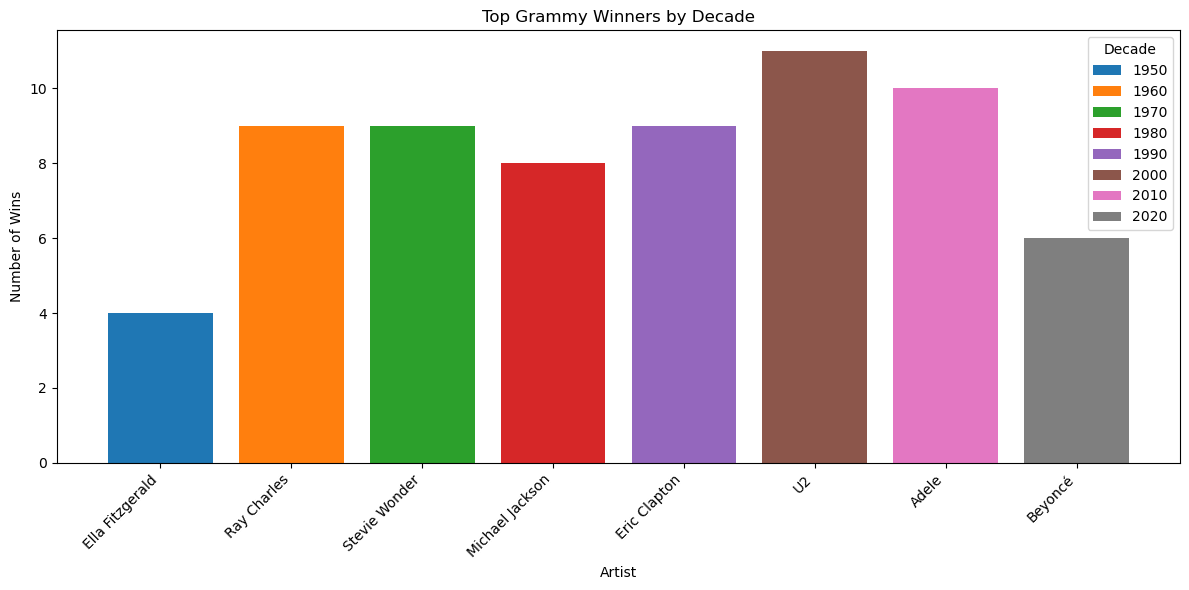

In [106]:
plt.figure(figsize=(12, 6))
for decade in top_artists['decade'].unique():
    subset = top_artists[top_artists['decade'] == decade]
    plt.bar(subset['artist'], subset['wins'], label=str(int(decade)))

plt.xlabel("Artist")
plt.ylabel("Number of Wins")
plt.title("Top Grammy Winners by Decade")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Decade')
plt.tight_layout()
plt.show()

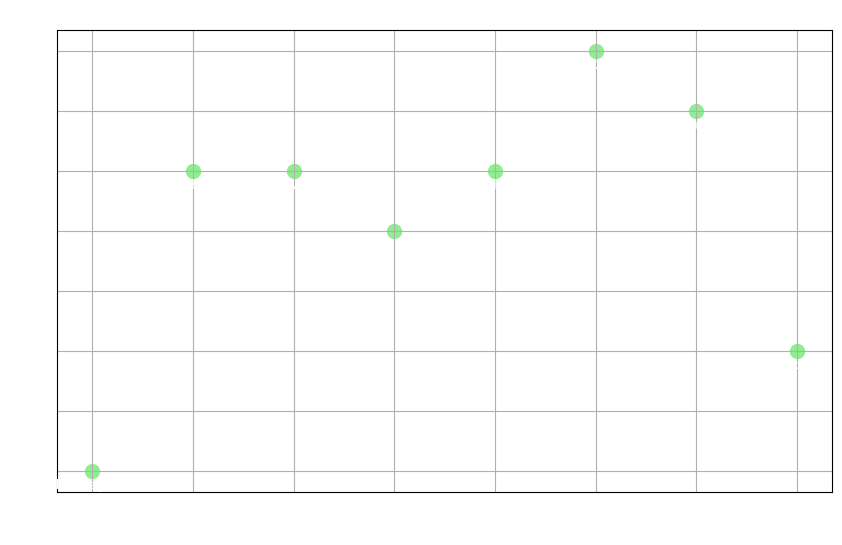

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(top_artists['decade'], top_artists['wins'], s=100, c='lightgreen')

for i, row in top_artists.iterrows():
    plt.text(row['decade'], row['wins'] + -0.30, row['artist'], ha='center', fontsize=9, color='white')

plt.xlabel("Decade",color='white')
plt.ylabel("Number of Wins",color='white')
plt.title("Top Grammy Winners Per Decade", color='white')
plt.grid(True)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.savefig("grammy_winners_per_decade.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

#### Which categories have the most wins?

In [109]:
top_categories = grammy_df[grammy_df['grammy_winner'] == 'winner']['grammy_category'].value_counts().reset_index()
top_categories.columns = ['category', 'wins']
top_categories.head(10)

,category,wins
0,Record Of The Year,67
1,Song Of The Year,67
2,Album Of The Year,64
3,Best Opera Recording,62
4,Best Album Notes,60
5,Best Country Song,54
6,Best Instrumental Composition,52
7,Best New Artist,49
8,Best Historical Album,43
9,Best Chamber Music Performance,42


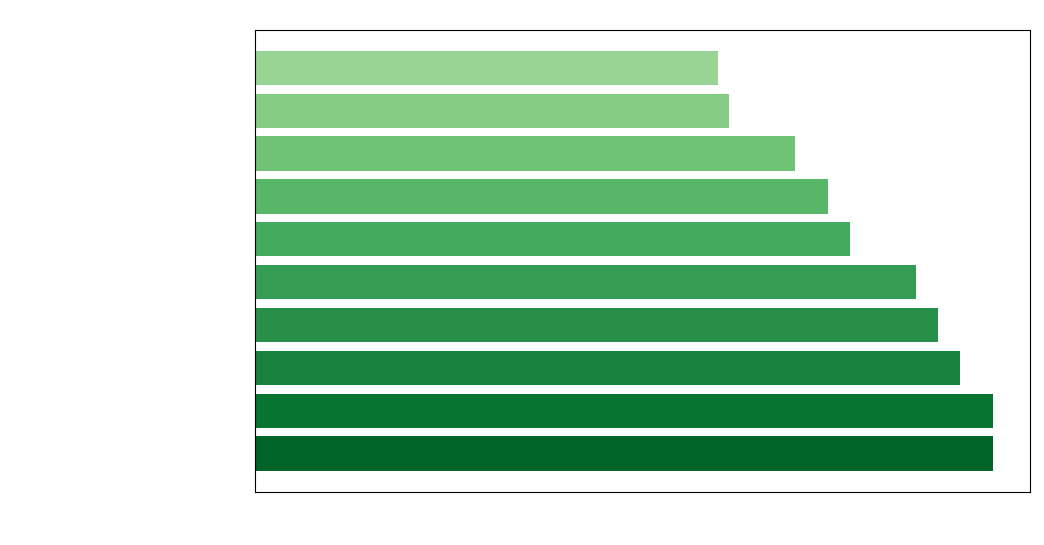

In [110]:
top_categories_plot = top_categories.head(10)

colors = plt.cm.Greens(np.linspace(0.4, 0.9, len(top_categories_plot)))[::-1]
plt.figure(figsize=(10, 6))
plt.barh(top_categories_plot['category'], top_categories_plot['wins'], color=colors)
plt.xlabel("Number of Wins", color='white')
plt.title("Top Grammy Categories by Wins", color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.savefig("grammy_top_categories_gradient.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

#### Which songs have won the most grammys of all time?

In [112]:
song_win_counts = winners.groupby(['song_or_album', 'artist']).size().reset_index(name='win_count')

In [113]:
song_win_counts = song_win_counts.sort_values(by='win_count', ascending=False)

In [114]:
song_win_counts.head(10)

,song_or_album,artist,win_count
1361,King Of The Road,Roger Miller,4
2684,"Up, Up And Away",5th Dimension,4
1956,Ray Of Light,Madonna,3
1763,Not Like Us,Kendrick Lamar,3
1719,Need You Now,Lady Antebellum,3
24,24K Magic,Bruno Mars,3
1735,Nick Of Time,Bonnie Raitt,3
2553,This Is America,Childish Gambino,3
466,By The Time I Get To Phoenix,Glen Campbell,3
1987,Respect,Aretha Franklin,2


In [115]:
song_win_counts.describe()

,win_count
count,2900.000000
mean,1.043103
std,0.224117
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


#### What % of songs win 1 grammy? How about 2? 3? 4? 

In [117]:
total_songs = music_df[['artist_clean', 'song_clean']].drop_duplicates().shape[0]

In [118]:
song_win_summary = winners.groupby(['song_or_album', 'artist']).agg(win_count=('grammy_year', 'count')).reset_index()

In [119]:
song_win_summary.head()

,song_or_album,artist,win_count
0,#Eldisco,Alejandro Sanz,1
1,'Ikena,Tia Carrere & Daniel Ho,1
2,'Round Midnight,Bobby McFerrin,2
3,'Til Summer Comes Around,Keith Urban,1
4,(Everything I Do) I Do It For You (From Robin ...,"Bryan Adams, Michael Kamen & Robert John Mutt ...",1


In [120]:
win_counts = song_win_summary['win_count'].value_counts().sort_index()
win_counts.head()

win_count
1    2786
2     105
3       7
4       2
Name: count, dtype: int64

In [121]:
win_stats = win_counts.reset_index()
win_stats.columns = ['Grammy Wins', 'Number of Songs']

In [122]:
win_stats['Percentage'] = (win_stats['Number of Songs'] / total_songs * 100).round(2)

In [123]:
win_stats.head()

,Grammy Wins,Number of Songs,Percentage
0,1,2786,9.40
1,2,105,0.35
2,3,7,0.02
3,4,2,0.01


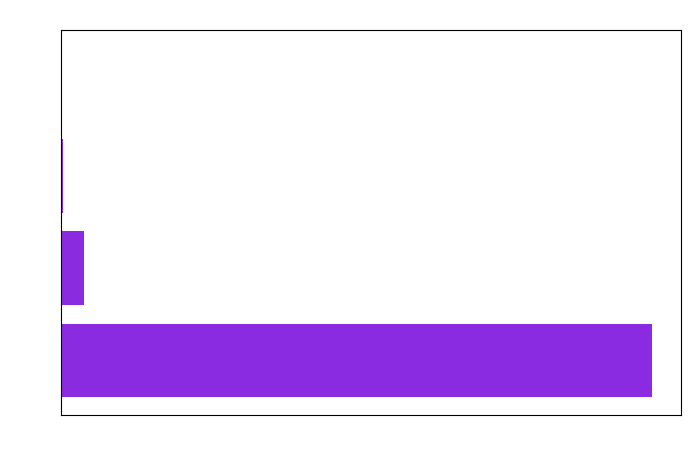

In [124]:
plt.figure(figsize=(8, 5))
plt.barh(win_stats['Grammy Wins'], win_stats['Number of Songs'], color='blueviolet')

plt.xlabel("Number of Songs", color='white')
plt.ylabel("Grammy Wins", color='white')
plt.title("Distribution of Grammy Wins per Song", color='white')

plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')

plt.show()

#### Investigate the billboard_df for insights.

In [126]:
billboard_df.head()

,billboard_date,rank,song_or_album,artist,peak_billboard_rank,weeks_on_billboard,artist_clean,song_clean
0,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,1,16,the kid laroi justin bieber,stay
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,1,14,lil nas x jack harlow,industry baby
3,2021-11-06,4,Fancy Like,Walker Hayes,3,19,walker hayes,fancy like
4,2021-11-06,5,Bad Habits,Ed Sheeran,2,18,ed sheeran,bad habits


#### Determine the unique values for songs and artists.

In [128]:
unique_songs = billboard_df['song_or_album'].nunique()
unique_artists = billboard_df['artist'].nunique()

#### Determine songs that stayed at the top of the charts for the longest.

In [130]:
longest_charting = billboard_df.groupby(['song_or_album', 'artist'])['weeks_on_billboard'].max().reset_index()
longest_charting.head()

,song_or_album,artist,weeks_on_billboard
0,"""B"" Girls",Young And Restless,15
1,"""Cherry Cherry"" from Hot August Night",Neil Diamond,10
2,"""Having A Party"" Medley",The Ovations (Featuring Louis Williams),9
3,"""Joy"" Pt. I",Isaac Hayes,9
4,"""Roots"" Medley",Quincy Jones,7


In [131]:
top_charting = longest_charting.sort_values('weeks_on_billboard', ascending=False).head(10)
top_charting.head(10)

,song_or_album,artist,weeks_on_billboard
2902,Blinding Lights,The Weeknd,90
19686,Radioactive,Imagine Dragons,87
20689,Sail,AWOLNATION,79
12210,I'm Yours,Jason Mraz,76
10284,How Do I Live,LeAnn Rimes,69
18888,Party Rock Anthem,LMFAO Featuring Lauren Bennett & GoonRock,68
4666,Counting Stars,OneRepublic,68
7501,Foolish Games/You Were Meant For Me,Jewel,65
20402,Rolling In The Deep,Adele,65
2497,Before He Cheats,Carrie Underwood,64


C:\Users\alaur\AppData\Local\Temp\ipykernel_21312\1413713638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='song_or_album', x='weeks_on_billboard', data=top_charting, palette='Greens')


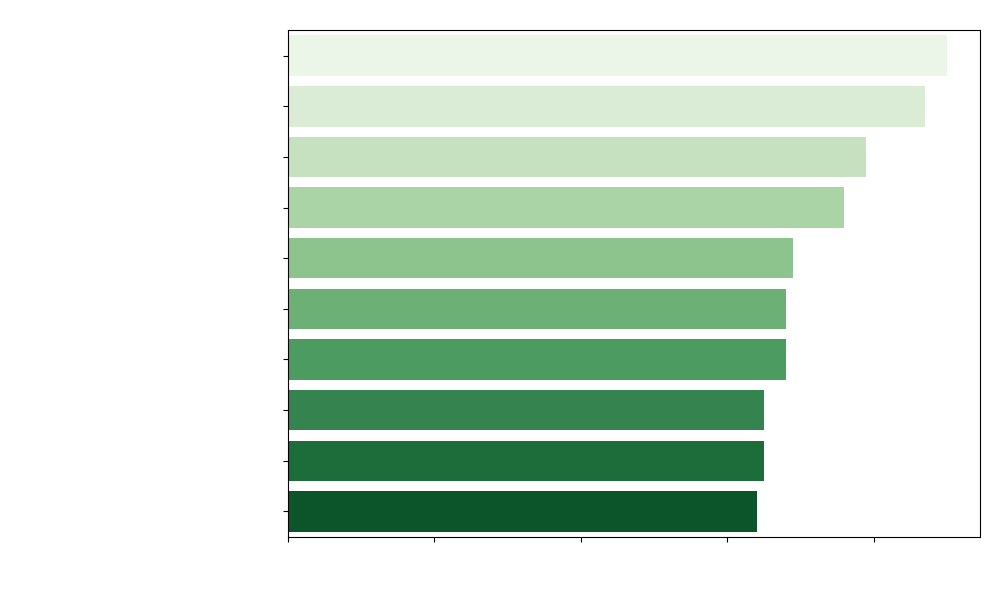

In [132]:
plt.figure(figsize=(10,6))
sns.barplot(y='song_or_album', x='weeks_on_billboard', data=top_charting, palette='Greens')
plt.title("Top 10 Longest-Charting Songs on Billboard", color='white')
plt.xlabel("Weeks on Billboard", color='white')
plt.ylabel("")
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.savefig("longest_charting_songs.png", dpi=300, transparent=True)
plt.show()

In [133]:
print(unique_songs)

24620


In [134]:
print(unique_artists)

10205


#### General description of the df.

In [136]:
billboard_df.describe()

,rank,peak_billboard_rank,weeks_on_billboard
count,330087.000000,330087.000000,330087.000000
mean,50.500929,40.970629,9.161785
std,28.866094,29.347481,7.618264
min,1.000000,1.000000,1.000000
25%,26.000000,13.000000,4.000000
50%,51.000000,38.000000,7.000000
75%,76.000000,65.000000,13.000000
max,100.000000,100.000000,90.000000


#### Find artists with multiple billboard hits.

In [138]:
artist_song_counts = billboard_df.groupby('artist')['song_or_album'].nunique().reset_index().sort_values(by='song_or_album', ascending=False)
artist_song_counts.columns = ['artist', 'number_of_songs']

In [139]:
artist_song_counts.head()

,artist,number_of_songs
3336,Glee Cast,183
8214,Taylor Swift,120
2473,Drake,108
8356,The Beatles,65
448,Aretha Franklin,64


#### What does the distribution of weeks on the billboard look like?

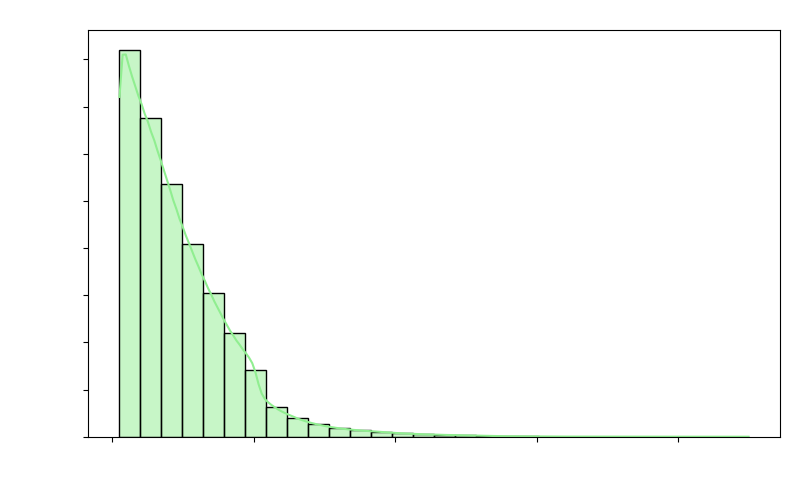

In [141]:
import matplotlib.ticker as ticker
plt.figure(figsize=(8,5))
sns.histplot(billboard_df['weeks_on_billboard'], bins=30, kde=True, color='lightgreen')
plt.title("Distribution of Weeks on Billboard", color='white')
plt.xlabel("Weeks on Billboard", color='white')
plt.ylabel("Number of Songs", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig("billboard_weeks_dist.png", dpi=300, transparent=True)
plt.show()

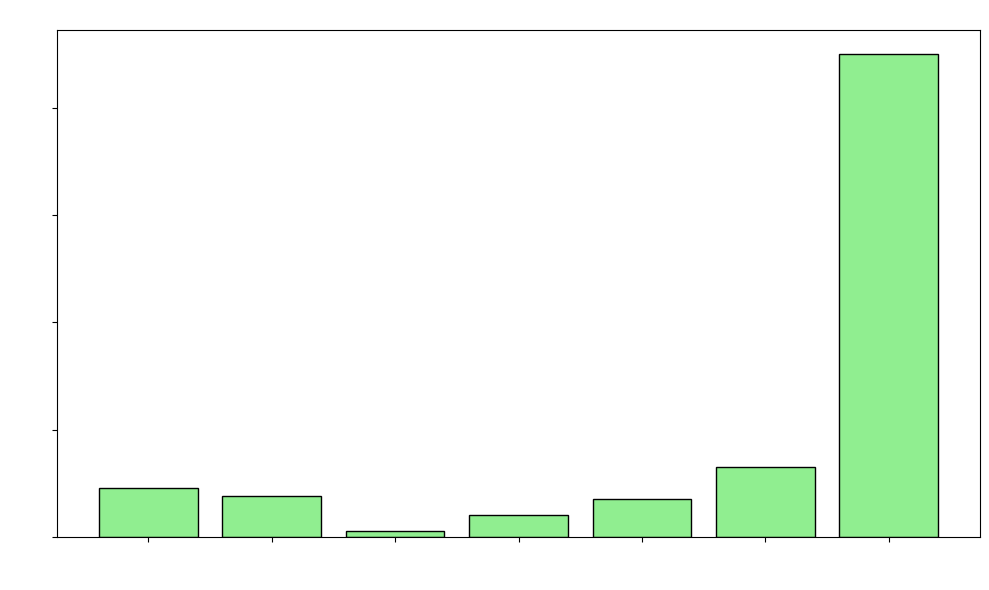

In [142]:
stats = billboard_df['weeks_on_billboard'].describe().drop('count')

plt.figure(figsize=(10,6))
bars = plt.bar(stats.index, stats.values, color='lightgreen', edgecolor='black')
plt.title("Summary Statistics for Weeks on Billboard", color='white')
plt.xlabel("Statistic", color='white')
plt.ylabel("Weeks", color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.savefig("weeks_on_bb_stats.png", dpi=300, transparent=True)
plt.show()

#### Find the top 10 artists with the most songs on the billboard. How many unique songs do they have on the billboard? What is their total number of weeks on the billboard?

In [144]:
artist_stats = billboard_df.groupby('artist').agg({'song_or_album': 'nunique','weeks_on_billboard': 'sum'}).reset_index()
artist_stats.head()

,artist,song_or_album,weeks_on_billboard
0,"""Groove"" Holmes",2,72
1,"""Little"" Jimmy Dickens",1,55
2,"""Pookie"" Hudson",1,1
3,"""Weird Al"" Yankovic",11,601
4,'N Sync,9,2004


In [145]:
artist_stats = artist_stats.rename(columns={'song_or_album': 'number_of_songs','weeks_on_billboard': 'total_weeks_on_billboard'})
artist_stats.head()

,artist,number_of_songs,total_weeks_on_billboard
0,"""Groove"" Holmes",2,72
1,"""Little"" Jimmy Dickens",1,55
2,"""Pookie"" Hudson",1,1
3,"""Weird Al"" Yankovic",11,601
4,'N Sync,9,2004


In [146]:
artist_stats_sorted = artist_stats.sort_values(by=['number_of_songs', 'total_weeks_on_billboard'], ascending=False)
artist_stats_sorted.head()

,artist,number_of_songs,total_weeks_on_billboard
3336,Glee Cast,183,287
8214,Taylor Swift,120,13689
2473,Drake,108,7287
8356,The Beatles,65,3548
448,Aretha Franklin,64,3490


In [147]:
artist_stats_sorted.drop_duplicates()
looking_closer = artist_stats_sorted.sort_values(by='total_weeks_on_billboard', ascending=False)
looking_closer.head(10)

,artist,number_of_songs,total_weeks_on_billboard
8214,Taylor Swift,120,13689
3713,Imagine Dragons,14,10915
9320,The Weeknd,43,9161
5580,Madonna,53,8391
2684,Elton John,58,8165
5642,Mariah Carey,32,8049
5682,Maroon 5,23,7957
2598,Ed Sheeran,26,7956
4712,Kelly Clarkson,24,7437
7238,Rihanna,27,7404


In [148]:
top_10_artists = artist_stats_sorted.head(10)
top_10_artists.head(10)

,artist,number_of_songs,total_weeks_on_billboard
3336,Glee Cast,183,287
8214,Taylor Swift,120,13689
2473,Drake,108,7287
8356,The Beatles,65,3548
448,Aretha Franklin,64,3490
2684,Elton John,58,8165
9096,The Rolling Stones,57,3798
4605,Kanye West,56,3258
8006,Stevie Wonder,54,5147
8355,The Beach Boys,54,3603


In [149]:
top_10_artists['avg_weeks_per_song'] = top_10_artists['total_weeks_on_billboard'] / artist_stats['number_of_songs']
top_10_artists.head(10)

C:\Users\alaur\AppData\Local\Temp\ipykernel_21312\1094258678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['avg_weeks_per_song'] = top_10_artists['total_weeks_on_billboard'] / artist_stats['number_of_songs']


,artist,number_of_songs,total_weeks_on_billboard,avg_weeks_per_song
3336,Glee Cast,183,287,1.568306
8214,Taylor Swift,120,13689,114.075000
2473,Drake,108,7287,67.472222
8356,The Beatles,65,3548,54.584615
448,Aretha Franklin,64,3490,54.531250
2684,Elton John,58,8165,140.775862
9096,The Rolling Stones,57,3798,66.631579
4605,Kanye West,56,3258,58.178571
8006,Stevie Wonder,54,5147,95.314815
8355,The Beach Boys,54,3603,66.722222


In [150]:
top_10_artists = top_10_artists.sort_values(by='total_weeks_on_billboard', ascending=False)
top_10_artists.head(10)

,artist,number_of_songs,total_weeks_on_billboard,avg_weeks_per_song
8214,Taylor Swift,120,13689,114.075000
2684,Elton John,58,8165,140.775862
2473,Drake,108,7287,67.472222
8006,Stevie Wonder,54,5147,95.314815
9096,The Rolling Stones,57,3798,66.631579
8355,The Beach Boys,54,3603,66.722222
8356,The Beatles,65,3548,54.584615
448,Aretha Franklin,64,3490,54.531250
4605,Kanye West,56,3258,58.178571
3336,Glee Cast,183,287,1.568306


#### The issue is that the number of weeks is compounding on a weekly basis. If a song has been on the billboard for 5 weeks, then it will count 5, 4, 3, 2, and 1 together. Let's fix that by grouping by unique song and artist, then taking the maximum value for weeks on the billboard.

In [152]:
billboard_df.head()

,billboard_date,rank,song_or_album,artist,peak_billboard_rank,weeks_on_billboard,artist_clean,song_clean
0,2021-11-06,1,Easy On Me,Adele,1,3,adele,easy on me
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,1,16,the kid laroi justin bieber,stay
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,1,14,lil nas x jack harlow,industry baby
3,2021-11-06,4,Fancy Like,Walker Hayes,3,19,walker hayes,fancy like
4,2021-11-06,5,Bad Habits,Ed Sheeran,2,18,ed sheeran,bad habits


In [153]:
max_weeks_per_song = billboard_df.groupby(['song_clean', 'artist_clean'])['weeks_on_billboard'].max().reset_index()
max_weeks_per_song.head()

,song_clean,artist_clean,weeks_on_billboard
0,,bill blacks combo,2
1,,darius rucker,15
2,,natasha bedingfield,6
3,,the merrygoround,4
4,0 to 100 the catch up,drake,20


##### Now total it by artist.

In [155]:
total_weeks_per_artist = max_weeks_per_song.groupby('artist_clean')['weeks_on_billboard'].sum().reset_index()
total_weeks_per_artist.head()

,artist_clean,weeks_on_billboard
0,1 of the girls,4
1,10,97
2,10 years,2
3,100 proof aged in soul,29
4,100 strings,1


In [156]:
total_weeks_per_artist = total_weeks_per_artist.sort_values(by='weeks_on_billboard',ascending=False)
total_weeks_per_artist.head(10)

,artist_clean,weeks_on_billboard
1966,drake,1403
6336,taylor swift,1126
2110,elton john,889
4276,madonna,885
5542,rihanna,876
3677,kenny chesney,809
1261,chris brown,799
4357,maroon 5,758
7440,tim mcgraw,750
7690,usher,748


#### Create a function that calculates the total # of weeks spent on the billboard for each of the top grammy winning artists per decade.

In [158]:
def get_total_weeks(artist_name):
    artist_weeks = total_weeks_per_artist[
        total_weeks_per_artist['artist_clean'] == artist_name
    ]
    
    if not artist_weeks.empty:
        total = artist_weeks['weeks_on_billboard'].values[0]
        print(f"{artist_name} spent {total} total weeks on the Billboard Hot 100.")
    else:
        print(f"{artist_name} not found in the dataset.")

In [159]:
get_total_weeks("ella fitzgerald")
get_total_weeks("ray charles")
get_total_weeks("stevie wonder")
get_total_weeks("michael jackson")
get_total_weeks("eric clapton",)
get_total_weeks("u2")
get_total_weeks("adele")
get_total_weeks("beyonce") 

ella fitzgerald spent 22 total weeks on the Billboard Hot 100.
ray charles spent 491 total weeks on the Billboard Hot 100.
stevie wonder spent 659 total weeks on the Billboard Hot 100.
michael jackson spent 629 total weeks on the Billboard Hot 100.
eric clapton spent 308 total weeks on the Billboard Hot 100.
u2 spent 376 total weeks on the Billboard Hot 100.
adele spent 304 total weeks on the Billboard Hot 100.
beyonce spent 686 total weeks on the Billboard Hot 100.


#### Use the music_df to evaluate matches across the billboard & grammy dataframes.

In [161]:
music_df.columns

Index(['billboard_date', 'rank', 'song_or_album_x', 'artist_x',
       'peak_billboard_rank', 'weeks_on_billboard', 'artist_clean',
       'song_clean', 'grammy_year', 'grammy_edition', 'grammy_category',
       'artist_y', 'producers', 'song_or_album_y', 'grammy_winner', 'url'],
      dtype='object')

In [162]:
music_df['grammy_winner'] = music_df['grammy_winner'].fillna('no grammy')
music_df['grammy_winner'] = music_df['grammy_winner'].replace({True: 'winner', False: 'nominated'})

In [163]:
billboard_counts = music_df.groupby('artist_clean')['song_clean'].nunique().reset_index()
billboard_counts = billboard_counts.rename(columns={'song_clean': 'billboard_songs'})

In [164]:
grammy_wins = music_df[music_df['grammy_winner'] == 'winner'].groupby('artist_clean')['song_clean'].nunique().reset_index()
grammy_wins = grammy_wins.rename(columns={'song_clean': 'grammy_wins'})

In [165]:
artist_awards = pd.merge(billboard_counts, grammy_wins, on='artist_clean', how='left')
artist_awards['grammy_wins'] = artist_awards['grammy_wins'].fillna(0).astype(int)

In [166]:
top_artists_with_grammys = artist_awards.sort_values(by='grammy_wins', ascending=False).head(10)

In [167]:
print(top_artists_with_grammys)

           artist_clean  billboard_songs  grammy_wins
582             beyonce               50           10
2134             eminem               71            7
5403        ray charles               67            7
335     aretha franklin               64            6
976   bruce springsteen               26            6
112               adele               14            6
7660                 u2               29            6
7690              usher               34            5
1843       dixie chicks               17            5
3672     kendrick lamar               29            5


In [168]:
billboard_no_grammy = artist_awards[artist_awards['grammy_wins'] == 0].sort_values(by='billboard_songs', ascending=False).head(10)

In [169]:
print(billboard_no_grammy)

                            artist_clean  billboard_songs  grammy_wins
2596                           glee cast              205            0
3568                       justin bieber               74            0
2448                              future               60            0
7951          youngboy never broke again               56            0
2123  elvis presley with the jordanaires               55            0
6460                      the beach boys               54            0
1419                      connie francis               53            0
4473                           meek mill               52            0
4797                        neil diamond               52            0
2121                       elvis presley               50            0


In [170]:
artist_awards['grammy_to_billboard_ratio'] = artist_awards['grammy_wins'] / artist_awards['billboard_songs']
artist_awards.head(10)

,artist_clean,billboard_songs,grammy_wins,grammy_to_billboard_ratio
0,1 of the girls,1,0,0.0
1,10,8,0,0.0
2,10 years,1,0,0.0
3,100 proof aged in soul,4,0,0.0
4,100 strings,1,0,0.0
5,10cc,9,0,0.0
6,112,11,0,0.0
7,12 gauge,1,0,0.0
8,1910 fruitgum co,7,0,0.0
9,1927,1,0,0.0


In [171]:
artist_awards_sorted = artist_awards.sort_values(by='grammy_to_billboard_ratio', ascending=False)
artist_awards_sorted.head(50)

,artist_clean,billboard_songs,grammy_wins,grammy_to_billboard_ratio
6507,the brian setzer orchestra,1,1,1.000000
5363,rage against the machine,1,1,1.000000
4162,los lonely boys,1,1,1.000000
1833,dirty vegas,1,1,1.000000
2822,homer,1,1,1.000000
5309,puff daddy faith evans,1,1,1.000000
903,brandy monica,1,1,1.000000
5270,portugal the man,1,1,1.000000
6877,the kendalls,1,1,1.000000
3848,lady gaga bradley cooper,1,1,1.000000


#### Filter out 1 hit wonders

In [173]:
multiple_grammy_winners = artist_awards[artist_awards['grammy_wins'] > 1]
multiple_grammy_winners = multiple_grammy_winners.sort_values(by='grammy_wins', ascending=False)
multiple_grammy_winners.head(20)

,artist_clean,billboard_songs,grammy_wins,grammy_to_billboard_ratio
582,beyonce,50,10,0.200000
5403,ray charles,67,7,0.104478
2134,eminem,71,7,0.098592
112,adele,14,6,0.428571
976,bruce springsteen,26,6,0.230769
335,aretha franklin,64,6,0.093750
7660,u2,29,6,0.206897
1843,dixie chicks,17,5,0.294118
3672,kendrick lamar,29,5,0.172414
6190,stevie wonder,54,5,0.092593


In [174]:
category_averages = grammy_unique.groupby('grammy_winner')[audio_features].mean().round(2)
category_min = grammy_unique.groupby('grammy_winner')[audio_features].min().round(2)
category_max = grammy_unique.groupby('grammy_winner')[audio_features].max().round(2)

In [175]:
category_averages.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
grammy_winner,,,,,,,,,,
nominated,28.24,60.97,61.04,2.79,18.17,-8.44,53.32,7.37,118.90,56.78
winner,28.89,61.65,59.74,3.17,18.39,-8.53,56.38,7.19,117.56,56.43


In [176]:
category_averages.rename(index={'nominated': 'Nominated', 'winner': 'Winner'}, inplace=True)
category_averages.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
grammy_winner,,,,,,,,,,
Nominated,28.24,60.97,61.04,2.79,18.17,-8.44,53.32,7.37,118.90,56.78
Winner,28.89,61.65,59.74,3.17,18.39,-8.53,56.38,7.19,117.56,56.43


In [177]:
category_min.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
grammy_winner,,,,,,,,,,
nominated,0,0,5,0,1,-23.15,0.0,0,0.0,0
winner,0,0,3,0,3,-22.60,0.0,0,0.0,0


In [178]:
category_min.rename(index={'nominated': 'Nominated', 'winner': 'Winner'}, inplace=True)
category_min.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
grammy_winner,,,,,,,,,,
Nominated,0,0,5,0,1,-23.15,0.0,0,0.0,0
Winner,0,0,3,0,3,-22.60,0.0,0,0.0,0


In [179]:
category_max.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
grammy_winner,,,,,,,,,,
nominated,97,98,100,96,99,-0.98,95.0,73,208.70,98
winner,97,96,99,90,99,-0.90,91.0,48,206.49,98


In [180]:
category_max.rename(index={'nominated': 'Nominated', 'winner': 'Winner'}, inplace=True)
category_max.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
grammy_winner,,,,,,,,,,
Nominated,97,98,100,96,99,-0.98,95.0,73,208.70,98
Winner,97,96,99,90,99,-0.90,91.0,48,206.49,98


**song_or_album:** The track's title.<br>
**artist:** Artist/s who participated in the track.<br>
**duration_ms:** Length of the track in milliseconds (ms).<br>
**song_release_year:** The year in which the track was released.<br>
**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic.<br>
**danceability:** Describes how suitable a track is for dancing. A value of 0.0 is least danceable and 1.0 is most danceable.<br>
**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast and loud.<br>
**instrumentalness:** Predicts whether a track contains no vocals.<br>
**liveness:** Detects the presence of an audience in the recording.<br>
**loudness:** The overall loudness of a track in decibels (dB).<br>
**speechiness:** Detects the presence of spoken words in a track.<br>
**tempo:** The overall estimated tempo of a track in beats per minute (BPM).<br>
**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.<br>
**mode:** Melodic content from the modality of a track. 1 = Major; 0 = Minor.<br>
**key:** The estimated overall key of a track from the Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.<br>
**popularity:** A track's popularity, 0-100 where 100 is the most popular based on Spotify's algorithm.<br>
**explicit:** Whether or not the track has explicit lyrics. 1 = True; 0 = False.<br>

In [182]:
#Keep only values that are 0-100 for easier chart creation

In [183]:
cols_to_drop = ['instrumentalness', 'liveness', 'loudness', 'tempo']

category_averages = category_averages.drop(columns=cols_to_drop, errors='ignore')
category_min = category_min.drop(columns=cols_to_drop, errors='ignore')
category_max = category_max.drop(columns=cols_to_drop, errors='ignore')

In [184]:
def plot_bar(df, title, filename):
    fig, ax = plt.subplots(figsize=(12, 8), facecolor='none')  
    
    distinct_greens = [
    '#00FF7F',
    '#32CD32',
    '#228B22',
    '#66CDAA',
    '#3CB371',
    '#9ACD32',
]
    colors = distinct_greens[:len(df.columns)]
    
    bars = df.plot(kind='bar', color=colors, ax=ax, width=0.7)
    
    ax.set_title(title, color='white', fontsize=18)
    ax.set_ylabel('Value', color='white', fontsize=14)
    ax.set_xlabel('Grammy Winner Category', color='white', fontsize=14)
    
    ax.tick_params(axis='x', colors='white', rotation=0, labelsize=12)
    ax.tick_params(axis='y', colors='white', labelsize=12)
    
    legend = ax.legend(title='Audio Features', bbox_to_anchor=(1.05, 1), loc='upper left', facecolor='#4B0082', frameon=True)
    plt.setp(legend.get_texts(), color='white')
    plt.setp(legend.get_title(), color='white')
    
    ax.set_facecolor('none')
    fig.patch.set_alpha(0.0)
    
    for container in bars.containers:
        for bar in container:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 6),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        color='white', fontsize=10)
    
    plt.tight_layout()
    
    plt.savefig(filename, dpi=300, bbox_inches='tight', transparent=True)
    plt.close()

plot_bar(category_averages, 'Average Audio Features by Grammy Category', 'average_audio_features.png')
plot_bar(category_min, 'Minimum Audio Features by Grammy Category', 'min_audio_features.png')
plot_bar(category_max, 'Maximum Audio Features by Grammy Category', 'max_audio_features.png')